In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" director

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [76]:
from sklearn.datasets import load_iris

In [77]:
iris = load_iris()

In [78]:
data = pd.DataFrame(iris.data,columns = iris.feature_names)

In [79]:
data["target"] = iris.target

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x  = data.iloc[:,0:4].values

In [82]:
x.shape

(150, 4)

In [83]:
y = data["target"].values

In [84]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size = 0.2)

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
lg = LogisticRegression()

In [87]:
lg.fit(xtr,ytr)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
y_pred = lg.predict(xte)

In [89]:
from sklearn.metrics import accuracy_score,r2_score

In [90]:
accuracy_score(yte,y_pred)

0.9666666666666667

In [91]:
r2_score(yte,y_pred)

0.95

In [92]:
lg1 = LogisticRegression()

In [134]:
x_mat = x[:,1:3]

In [135]:
x_mat.shape

(150, 2)

In [136]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [137]:
y_mat = y

In [138]:
a = np.arange(x_mat[:,0].min() -1,x_mat[:,0].max() + 1,step = 0.01)

In [139]:
b = np.arange(x_mat[:,1].min()-1,x_mat[:,1].max() + 1,step = 0.01)

In [140]:
XX,YY = np.meshgrid(a,b)

In [141]:
from matplotlib.colors import ListedColormap

In [142]:
input_array = np.array([XX.ravel(),YY.ravel()]).T

In [143]:
lg1.fit(x_mat,y_mat)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
Z = lg1.predict(input_array)

In [145]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

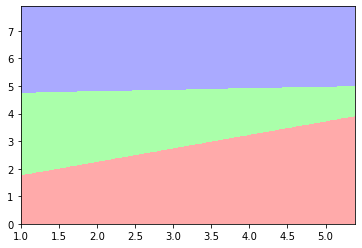

In [146]:
Z = Z.reshape(XX.shape)
plt.figure()
plt.pcolormesh(XX, YY, Z, cmap=cmap_light)

(0.0, 7.890000000000001)

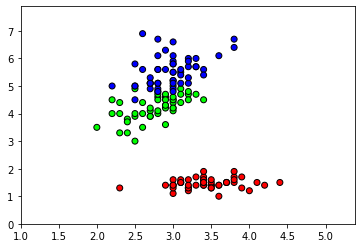

In [147]:
plt.scatter(x_mat[:, 0], x_mat[:, 1], c=y, cmap=cmap_bold,edgecolor = 'black')
plt.xlim(XX.min(), XX.max())
plt.ylim(YY.min(), YY.max())

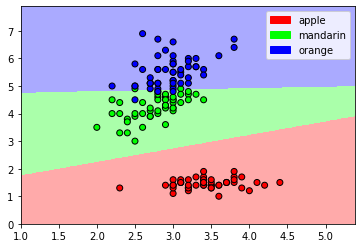

In [148]:
Z = Z.reshape(XX.shape)
plt.figure()
plt.pcolormesh(XX, YY, Z, cmap=cmap_light)
plt.scatter(x_mat[:, 0], x_mat[:, 1], c=y, cmap=cmap_bold,edgecolor = 'black')
plt.xlim(XX.min(), XX.max())
plt.ylim(YY.min(), YY.max())
patch0 = mpatches.Patch(color='#FF0000', label='apple')
patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
patch2 = mpatches.Patch(color='#0000FF', label='orange')

plt.legend(handles=[patch0, patch1, patch2])


In [149]:
import matplotlib.patches as mpatches

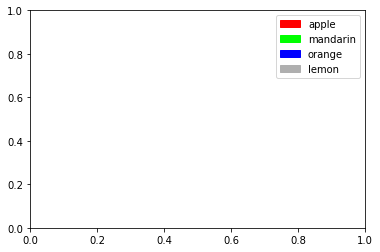

In [150]:
patch0 = mpatches.Patch(color='#FF0000', label='apple')
patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
patch2 = mpatches.Patch(color='#0000FF', label='orange')
patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
plt.legend(handles=[patch0, patch1, patch2, patch3])


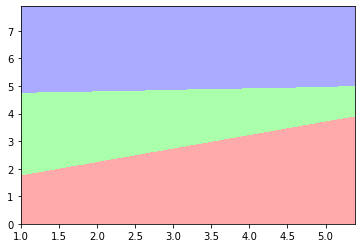

In [152]:
plt.contour(XX, YY, Z, cmap=cmap_light)
plt.scatter(x_mat[:, 0], x_mat[:, 1], c=y, cmap=cmap_bold,edgecolor = 'black')
plt.xlim(XX.min(), XX.max())
plt.ylim(YY.min(), YY.max())